In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
from selenium.common.exceptions import TimeoutException
import time
import ast

from collections import OrderedDict 
import time
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
service = Service(executable_path="./chromedriver.exe")
driver = webdriver.Chrome(service = service)

In [3]:
driver.get("https://www.instagram.com/")

In [4]:
#update your username and password here
username = 'Sample Username'
password = 'Sample password'

#initializing  wait object
wait = WebDriverWait(driver, 10)
def LogIn(username, password):
    try :
        #locating username textbox and sending username
        user_name = wait.until(EC.presence_of_element_located((By.NAME,'username')))
        user_name.send_keys(username)
        #locating password box and sending password
        pwd = driver.find_element(By.NAME, 'password')
        pwd.send_keys(password)
        #locating login button 
        button = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="loginForm"]/div[1]/div[3]/button/div')))
        button.submit()
        #Save Your Login Info? : Not Now
        time.sleep(2)
        pop = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_ac8f')))
        pop.click()
        
    except TimeoutException :
        print ("Something went wrong! Try Again")
        
        
LogIn(username, password)

In [5]:
def search_open_profile(s):
    try:
        #locatong search box bar and sending text 
        wait = WebDriverWait(driver, 10)
        search_box = wait.until(EC.presence_of_element_located((By.XPATH, "//input[@placeholder='Search']")))
        
        time.sleep(3)

        search_box.send_keys(s)
        #locating serched result
        time.sleep(3)
        res = wait.until(EC.presence_of_element_located((By.XPATH, "//div/div[contains(@class, 'x9f619')]/a[contains(@href, '/')]/div")))
        res.click()           

        time.sleep(5)
        #driver.back()

    except TimeoutException :
        print('No Search Found!')
        

### Problem 1 : Analyse the habits of bloggers
#Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
* 1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
* 2.Now Find the number of posts these handles have done in the previous 3 days.
* 3.Depict this information using a suitable graph.

In [6]:
#First 10 handles from part-1
handles_list = ["foodiesandy_", "foodtalkindia", "dilsefoodie", "foodistamysuru", 
 "foody.monk", "foodie_brahamana", "foodpharmer", "yourfoodlab","foodstorieswithus", "foodloversindia"]

In [7]:
#function for getting top 5 handle which have highest number of followers
def top_5_handles(lst):
    try:
        #dct contains username with number of followers
        dct = {}
        for i in lst :
            #This fuction will search a user and open that profile
            search_open_profile(i)
            time.sleep(3)
            #locating followers of user
            followers = driver.find_elements(By.CLASS_NAME, '_ac2a')[1]
            time.sleep(3)
            #replacing ',' with '' and converted into int
            dct[i] = int(followers.get_attribute('title').replace(',' , ''))
            time.sleep(3)
            driver.back()
            time.sleep(3)
        #top 5 most followed user
        count = 0
        res = OrderedDict()
        for i in sorted(dct, key=dct.get, reverse=True):
            res[i] = dct[i]
            count += 1
            if(count >= 5) : 
                break
                
        return res
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [9]:
top_handles = top_5_handles(handles_list)

In [10]:
print('Top 5 instagram handles which have the highest number of followers :')
for uname in top_handles:
    print(uname,'->',top_handles[uname])

Top 5 instagram handles which have the highest number of followers :
yourfoodlab -> 2726443
dilsefoodie -> 1190710
foodpharmer -> 1076174
foodtalkindia -> 310040
foody.monk -> 204248


In [11]:
#this function returns number of post posted by user in n days
def count_of_post(day):
    try :
        #locating first post
        post = driver.find_element(By.XPATH, "//div[contains (@class, '_aabd')]/a")
        post.click()
        
        time.sleep(2)
        count = 0 
        while True :
            #getting date of the the post
            temp = driver.find_element(By.TAG_NAME, 'time')
            time.sleep(2)
            #getting date in string format
            date_string = temp.get_attribute('datetime')
            time.sleep(2)
            #converting into date format
            date = datetime.strptime(date_string[0:19], "%Y-%m-%dT%H:%M:%S")
            time.sleep(2)
            #taking differnce between today's date and post posted date
            if (datetime.now() - date).days > day :
                break
            else :
                count += 1
            #locating next button
            next_but = driver.find_element(By.XPATH, "//div[contains (@class, '_aaqg')]/button")
            time.sleep(1)
            next_but.click()
        #closing the post
        close=driver.find_element(By.XPATH, "//div[contains (@class, 'x160vmok')]//div[contains (@role, 'button')]")
        close.click()
        return count
    
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [12]:
total_post_count = {}
for i in top_handles :
    search_open_profile(i)
    time.sleep(3)
    count = count_of_post(3)
    total_post_count[i] = count
    driver.back()
    time.sleep(3)

In [13]:
print('Number of posts these handles have done in the previous 3 days : -')
for i in total_post_count:
    print(i,total_post_count[i])

Number of posts these handles have done in the previous 3 days : -
yourfoodlab 3
dilsefoodie 7
foodpharmer 0
foodtalkindia 6
foody.monk 0


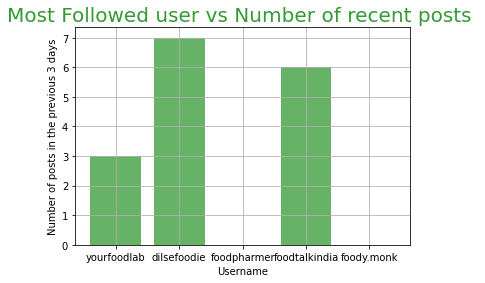

In [14]:
# using total_post_count to get username and number of post
x = total_post_count.keys()
y = total_post_count.values()
plt.bar(x,y,color='g',alpha=0.6)
plt.ylabel("Number of posts in the previous 3 days",size=10)
plt.xlabel("Username",size=10)
plt.title('Most Followed user vs Number of recent posts ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()

### Problem 2 : List of hashtags
Your friend also needs a list of hashtags that he should use in his posts.
* 1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
* 2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
* 3.Create a csv file with two columns : the word and its frequency
* 4.Now, find the hashtags that were most popular among these bloggers
* 5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [15]:
def extract_content(lst):
    try :
        hashtags_list = []
        
        for user in lst:
            #This fuction will search a user and open that profile
            search_open_profile(user)
            time.sleep(3)
            #just for scrolling to getting post
            driver.execute_script('window.scrollTo(0, 3000);')
            time.sleep(2)
            driver.execute_script('window.scrollTo(0, -3000);')
            time.sleep(2)
            
            #locating the post of the user
            posts = driver.find_elements(By.XPATH, "//div[contains (@class, '_aabd')]/a")
            for post in posts[:10]:
                post.click()
                time.sleep(3)
                
                #locating all hashtag used in this post
                hashtags=driver.find_elements(By.XPATH, "//div[contains (@class, '_a9zs')]/h1/a")
                for hashtag in hashtags:
                    text = hashtag.text
                    if "#" in text:
                        hashtags_list.append(text)
                    #appending in list
                    #hashtags_list.append(hashtag.text)  
                
                #locating close button and clicking on it
                close=driver.find_element(By.XPATH, "//div[contains (@class, 'x160vmok')]//div[contains (@role, 'button')]")

                time.sleep(3)
                close.click()
            driver.back()
            time.sleep(2)
        return hashtags_list
    
    except TimeoutException :
        print ("Something went wrong! Try Again")

In [16]:
handles = list(total_post_count.keys())
handles

['yourfoodlab', 'dilsefoodie', 'foodpharmer', 'foodtalkindia', 'foody.monk']

In [19]:
hashtags = extract_content(handles)

In [20]:
print(hashtags)

['#dilsefoodie', '#food', '#diwali', '#diwali23', '#hampers', '#dilsefoodie', '#food', '#patiaalahousethailand', '#nonveg', '#dilsefoodie', '#food', '#cholekulche', '#streetfood', '#dilsefoodie', '#Pistachio', '#HappyDiwali2023', '#Food', '#ChandniChowk', '#Californiapistachios', '#Pistachios', '#AmericanPistachiosIndia', '#AmericanPistachios', '#Ad', '#dilsefoodie', '#food', '#cholebhature', '#streetfood', '#dilsefoodie', '#food', '#Happydiwali', '#celebration', '#dilsefoodie', '#food', '#canada', '#blogger', '#streetfood', '#dilsefoodie', '#food', '#paneer', '#tikka', '#bangalore', '#dilsefoodie', '#food', '#haldwani', '#biryani', '#dilsefoodie', '#food', '#justlookinglikeawow', '#aerocity', '#food', '#ingredients', '#podcast', '#rajshamani', '#figuringout', '#FoodPharmer', '#Food', '#HealthyFood', '#USAGrocery', '#Indiangrocery', '#CelebrationMenu', '#Biryani', '#BiryaniPulao', '#Pulao', '#ITCHotels', '#ITC', '#ITCButlerService', '#ITCButler', '#ButlerService', '#Butler', '#Signatur

In [21]:
dct = {}
words_list = []
for word in hashtags:
    dct[word] = dct.get(word,0) + 1
    
for i in sorted(dct, key=dct.get, reverse=True):
    words_list.append([i,dct[i]])
    print(i,dct[i])

#dilsefoodie 10
#food 10
#foodymonk 10
#eatwithmonk 10
#reels 8
#reelsinstagram 8
#reeloftheday 8
#reelitfeelit 8
#kannadareels 8
#streetfood 7
#bengalurufoodie 7
#bangaloredays 7
#reelkarofeelkaro 7
#bangalorefoodies 6
#ITCHotels 4
#Discover 4
#DiwaliGift 4
#DiwaliGifting 4
#Food 3
#ITC 3
#Diwali 3
#DiwaliGiftHamper 3
#GiftHamper 3
#GiftHampers 3
#FestivalGift 3
#ButlerService 2
#DiwaliDelights 2
#FestiveCurations 2
#CelebratingLife 2
#GourmetCouch 2
#Gourmet 2
#DiwaliHampers 2
#DiwaliParty 2
#diwali 1
#diwali23 1
#hampers 1
#patiaalahousethailand 1
#nonveg 1
#cholekulche 1
#Pistachio 1
#HappyDiwali2023 1
#ChandniChowk 1
#Californiapistachios 1
#Pistachios 1
#AmericanPistachiosIndia 1
#AmericanPistachios 1
#Ad 1
#cholebhature 1
#Happydiwali 1
#celebration 1
#canada 1
#blogger 1
#paneer 1
#tikka 1
#bangalore 1
#haldwani 1
#biryani 1
#justlookinglikeawow 1
#aerocity 1
#ingredients 1
#podcast 1
#rajshamani 1
#figuringout 1
#FoodPharmer 1
#HealthyFood 1
#USAGrocery 1
#Indiangrocery 1
#Cel

In [22]:
df = pd.DataFrame(words_list,columns=['Words','Frequency'])
#using .to_csv pandas function to convert dataframe to csv
df.to_csv('words_frequency.csv',index=False)
df.head(10)

,Words,Frequency
0,#dilsefoodie,10
1,#food,10
2,#foodymonk,10
3,#eatwithmonk,10
4,#reels,8
5,#reelsinstagram,8
6,#reeloftheday,8
7,#reelitfeelit,8
8,#kannadareels,8
9,#streetfood,7


In [23]:
print(words_list[0][0])

#dilsefoodie


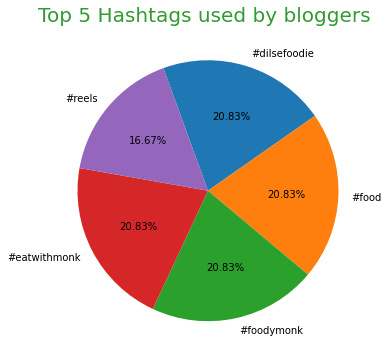

In [24]:
#using answer of problem 2.2
hashtag_name = [words_list[0][0],words_list[1][0],words_list[2][0],words_list[3][0],words_list[4][0]]
count = [words_list[0][1],words_list[1][1],words_list[2][1],words_list[3][1],words_list[4][1]]
plt.figure(figsize=(12,6))
plt.pie(count,labels=hashtag_name,autopct='%0.2f%%',radius=1,counterclock=False,startangle=110)
plt.title('Top 5 Hashtags used by bloggers ',fontsize=20, color='green',alpha=0.8)
plt.show()

### Problem 3 : Followers : Likes ratio
You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows:
* 1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.
* 2.Calculate the average likes for a handle.
* 3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
* 4.Create a bar graph to depict the above obtained information.

In [25]:
#This function returns list of likes of 10 post of a user
def get_likes(user):
    try :
        likes = []
        #This fuction will search a user and open that profile
        search_open_profile(user)
        time.sleep(3)

        #just for scrolling
        driver.execute_script('window.scrollTo(0, 3000);')
        time.sleep(2)
        driver.execute_script('window.scrollTo(0, -3000);')
        time.sleep(2)

        #locating the post of the user
        posts = driver.find_elements(By.XPATH, "//div[contains (@class, '_aabd')]/a")
        for post in posts[:10]:
            post.click()
            time.sleep(2)
            try : 
#                     #for getting like on video we need to first click on view then only we can like
#                     views = driver.find_element(By.XPATH, "//section[contains (@class, '_ae5m')]/div//span")
#                     views.click()
#                     time.sleep(1)

                #locating like and clicking on it
                like = driver.find_element(By.XPATH, "//section[contains (@class, '_ae5m')]/div//span")
                no_of_likes = int(like.text.split()[0].replace(",", ""))
                likes.append(no_of_likes)
                time.sleep(3)
                #locating close button and clicking on it
                close=driver.find_element(By.XPATH, "//div[contains (@class, 'x160vmok')]//div[contains (@role, 'button')]")
                time.sleep(3)
                close.click()
                time.sleep(3)
            except:
                print("eror")
                
                #if the post is image then this part will execute 
        return likes
    
    except TimeoutException :
        print("Something is wrong")

#                     like = driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[3]/section[2]/div/div/button/span')
#                     no_of_likes = (like.text).replace(',' , '')
#                     likes.append(int(no_of_likes))
#                     time.sleep(1)
#                 #locating close button and clicking on it
#                 close=driver.find_element_by_xpath("/html/body/div[4]/div[3]/button")
#                 time.sleep(1)
#                 close.click()

    

In [26]:
#dct will store username with list of likes
dct = {}
for user in handles : 
    likes = get_likes(user)
    time.sleep(2)
    driver.back()
    time.sleep(2)
    dct[user] = likes
    print('Number of likes of the top 10 posts of',user,':')
    for i in likes :
        print(i,'Likes')
    print()


Number of likes of the top 10 posts of yourfoodlab :
3494 Likes
6471 Likes
32508 Likes
8535 Likes
28171 Likes
22288 Likes
8970 Likes
11218 Likes
10906 Likes
6435 Likes

Number of likes of the top 10 posts of dilsefoodie :
984 Likes
3391 Likes
4745 Likes
3169 Likes
11175 Likes
1094 Likes
2503 Likes
4230 Likes
9720 Likes
2902 Likes

Number of likes of the top 10 posts of foodpharmer :
1606117 Likes
408345 Likes
13678 Likes
316017 Likes
50855 Likes
72981 Likes
89564 Likes
190137 Likes
66984 Likes
159872 Likes

Number of likes of the top 10 posts of foodtalkindia :
27 Likes
50 Likes
66 Likes
237 Likes
90 Likes
154 Likes
319 Likes
2349 Likes
185 Likes
699 Likes

Number of likes of the top 10 posts of foody.monk :
23884 Likes
4988 Likes
5025 Likes
1875 Likes
5349 Likes
36031 Likes
1796 Likes
8384 Likes
2876 Likes
4244 Likes



In [27]:
#This function will return a dictionary of {'username':average like}
def get_avg_likes(d):
    avg_likes = {}
    for key,val in d.items():
            avg = sum(val) // 10
            avg_likes[key] = avg
    return avg_likes

In [28]:
avg_likes = get_avg_likes(dct)

print('Average likes for each handle are :')
for user,likes in avg_likes.items():
    print(user, ':', likes)

Average likes for each handle are :
yourfoodlab : 13899
dilsefoodie : 4391
foodpharmer : 297455
foodtalkindia : 417
foody.monk : 9445


In [29]:
#This function will return dictionary of {'username':avg followers-like ratio}
def getavg_foll_like_ratio(top_handles,avg_like,users):
    foll_like = {}
    for i in range(5) :
        foll_like[users[i]] = top_handles[users[i]]//avg_like[users[i]]
    return foll_like

In [30]:
#here I am using the answer of problem 1.1 which contains a dictionary of {'username':followers} ie top_handles
#extracing username from top_handles
top_handles_names = list(top_handles.keys())
#now calling function getavg_foll_like_ratio(top_handles,avg_like,users) 
avg_fol_like_ratio = getavg_foll_like_ratio(top_handles, avg_likes, top_handles_names)
print('Average followers:like ratio of each handle :')
for user,ratio in avg_fol_like_ratio.items():
    print(user, ':', ratio)

Average followers:like ratio of each handle :
yourfoodlab : 196
dilsefoodie : 271
foodpharmer : 3
foodtalkindia : 743
foody.monk : 21


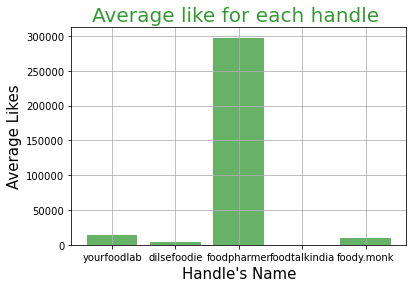

In [31]:
#for this I will use answer of problem 3.2 
username = list(avg_likes.keys())
avg_like = list(avg_likes.values())

plt.bar(username,avg_like,color='g',alpha=0.6)
plt.ylabel("Average Likes",size=15)
plt.xlabel("Handle's Name",size=15)
plt.title('Average like for each handle ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()

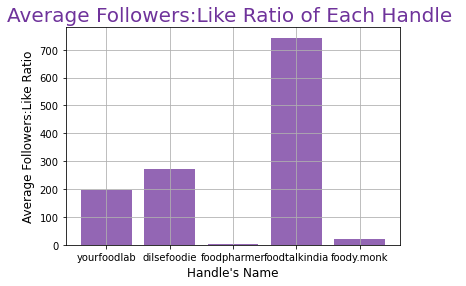

In [32]:
#For this I will use answer of problem 3.3
username = list(avg_fol_like_ratio.keys())
avg_like = list(avg_fol_like_ratio.values())

plt.bar(username,avg_like,color='Indigo',alpha=0.6)
plt.ylabel("Average Followers:Like Ratio",size=12)
plt.xlabel("Handle's Name",size=12)
plt.title('Average Followers:Like Ratio of Each Handle ',fontsize=20, color='Indigo',alpha=0.8)
plt.grid()
plt.show()